<a href="https://colab.research.google.com/github/mahend72/IOC_Ranking/blob/main/RankingIoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from google.colab import files
uploaded = files.upload()

Saving nvdcve-1.1-2014.json to nvdcve-1.1-2014.json


In [ ]:
!pip install --upgrade -q pyproj

     |████████████████████████████████| 6.3 MB 5.3 MB/s 


In [ ]:
from matplotlib.ticker import is_decade
import dateutil.parser as dp
from datetime import datetime
import operator

p_com=0.85
W_ext=0.8
W_tim=0.7
W_com=0.65

source_score=0.8

#current time
dt = datetime.now()
ts = datetime.timestamp(dt)

#list initialisation 
len1=[]
list_lmod=[]
Final_list=[]

# Dictionary of strings and ints
Final_dict1 = { }
Final_dict2= { }

file_name1 = "nvdcve-1.1-2014.json"
data1=json.loads(uploaded[file_name1].decode("utf-8"))

with open ('Ranking2014.csv', 'w') as fp:

  for i in data1['CVE_Items']:
    try:
      id=i['cve']['CVE_data_meta']['ID']
      fp.write(id)
      fp.write(",")
      #print(id)
      #result.append(id)
      ext=i['cve']['references']['reference_data']
      b_sev=i['impact']['baseMetricV3']['cvssV3']['baseSeverity']
      b_score=i['impact']['baseMetricV3']['cvssV3']['baseScore']
      fp.write(b_sev)
      fp.write(",")
      fp.write(str(b_score))
      fp.write(",")
      #print(b_sev)
      #print(b_score)
      if str(b_sev) == ("CRITICAL"):
          delta = 0.25
          x=21
      elif str(b_sev) == ("HIGH"):
          delta = 0.5
          x=14
      elif str(b_sev) == ("MEDIUM"):
          delta = 1.0
          x=7
      elif str(b_sev) == ("LOW"):
          delta = 2.0
          x=3
      else:
          delta = 4.0
          x=1
      
  #compute time
      pub_time = dp.parse(i['publishedDate'])
      pub_time_in_seconds = pub_time.timestamp()
      lmod_time = dp.parse(i['lastModifiedDate'])
      lmod_time_in_seconds = lmod_time.timestamp()
      list_lmod.append(lmod_time_in_seconds)

  #   print(lmod_time_in_seconds)
      time_diff=(lmod_time_in_seconds)-(pub_time_in_seconds)
      time1=ts-lmod_time_in_seconds
      days = divmod(time1, 86400) 
      hours = divmod(days[1], 3600)
      minutes = divmod(hours[1], 60)

  #compute likelihood score
      if time1 > 31536000:
          lik_score = 0.5
      elif time1 >2628000:
          lik_score = 5.0
      elif time1 > 1314000:
          lik_score = 5.0
      elif time1 > 86400:
          lik_score = 7.0
      else:
          lik_score = 9.0
      
    #compute decay function
      f_x=0.0
      for i in range(x):
          #print(i)
          f_x = float(pow(i/100,delta))+f_x
      #print("delay_value:", max(0,(1-f_x)))

  #compute Individual score as source_score_i*sev_score_i*lik_score_i*max(0,1-x/τ)^(1/δ)
      ind_score= source_score*b_score*lik_score*max(0,f_x)
      len1.append(len(ext[0]))
      p_ext=len(ext[0])/max(len1)


  #compute timeliness
      min_lmod=divmod(min(list_lmod), 86400)
      lmod1=divmod(lmod_time_in_seconds, 86400)
      p_tim= min_lmod[0]/lmod1[0]
      conf_score = (W_ext*p_ext+W_tim*p_tim+W_com*p_com)/(W_ext+W_tim+W_com)
      Final_score = (conf_score)*(ind_score)
      fp.write(str(Final_score))
      #Final_list.append(Final_score)
      #print("final list:", Final_list, "\n")
      #Final_dict1.update({id: Final_score})
      #Final_dict2.update({b_score:b_sev})
    except:
      pass
    fp.write("\n")

  #print(Final_list,"\n")
  #print("final dict", Final_dict1[0],"\n")
  #print("final dict2", Final_dict2,"\n")
  #sorted_dict = sorted(Final_dict.items(),key=operator.itemgetter(1),reverse=True)
  #print(sorted_dict,"\n")

  #with open('Ranking2002.json', 'w', encoding='utf-8') as fp:
  #    json.dump(sorted_dict, fp, ensure_ascii=False, indent=4)

  """
    for i in range(100):
      s1=str(Final_dict1[i]).replace("'","")
      s2=s1.replace(":",",")
      fp.write(s2)
      fp.write(",")
      s3=str(Final_dict2[i]).replace("'","")
      s4=s3.replace(":",",")
      fp.write(s4)
      fp.write(",")
      fp.write("\n")

      """


In [ ]:
data1 = data2 =data3 = data4 =data5 = data6 =data7 = data8 =data9 = data10 =data11 = ""
  
#Reading data from file1
with open('Ranking20.txt') as fp:
    data1 = fp.read()


# Reading data from file2
with open('Ranking2003.txt') as fp:
    data2 = fp.read()
    print("data2",data2)


with open('Ranking2004.txt') as fp:
    data3 = fp.read()
  
# Reading data from file2
with open('Ranking2005.txt') as fp:
    data4 = fp.read()
  
# Reading data from file2
with open('Ranking2006.txt') as fp:
    data5 = fp.read()
  
# Reading data from file2
with open('Ranking2007.txt') as fp:
    data6 = fp.read()
  
# Reading data from file2
with open('Ranking2008.txt') as fp:
    data7 = fp.read()
  
# Reading data from file2
with open('Ranking2009.txt') as fp:
    data8 = fp.read()
  
# Reading data from file2
with open('Ranking2010.txt') as fp:
    data9 = fp.read()
  
# Reading data from file2
with open('Ranking2011.txt') as fp:
    data10 = fp.read()

# Reading data from file2
with open('Ranking2012.txt') as fp:
    data11 = fp.read()
  
# Merging 2 files
# To add the data of file2
# from next line
#data += "\n"
data1 =data1 + data2 +data3 + data4 +data5 + data6 +data7 + data8 +data9 + data10 +data11
  
with open ('final.txt', 'w') as fp:
    fp.write(data1)



#print(type(dictionary))

    #data = []
    #for line in inf:
        #l=line.strip()
        #print(l)
        #l1=l.replace("(","[")
        #l2=l1.replace(")","]")
        #l3=l2.replace("'","\"")
        #print("line:",l2)
        #print(line[0])
        #data.append(l2)
        #d1='[%s]' % ', '.join(map(str, data))
        #print ("data", data,"\n")
        #print("data:", data)
        
#data.sort(key = lambda tup: tup[1],reverse=True)
#a= sorted(data, key = lambda element : element[1])
    #a = sorted(data, key=lambda x: x[1], reverse=True)
#print("sorted:", data)

#with open("final1.txt",'w') as inf:
    #for i in range(50):
      #print(data[i])
      #inf.write(data[i])
      #inf.write("\n")



In [ ]:
import dateutil.parser as dp
file_name = "nvdcve-1.1-2021.json"
data=json.loads(uploaded[file_name].decode("utf-8"))
t=100
for i in data['CVE_Items']:
    print(i['cve']['CVE_data_meta']['ID'])
    b_sev=i['impact']['baseMetricV3']['cvssV3']['baseSeverity']

# compute base score and decay function
    if str(b_sev) == ("CRITICAL"):
        b_score = 9.5
        delta = 0.25
        x=21
    elif str(b_sev) == ("HIGH"):
        b_score = 8.0
        delta = 0.5
        x=7
    elif str(b_sev) == ("MEDIUM"):
        b_score = 5.5
        delta = 1.0
        x=3
    elif str(b_sev) == ("LOW"):
        b_score = 2.0
        delta = 2.0
        x=1
    else:
        b_score = 0.0
        delta = 4.0
        x=1
    print("base severity:", b_sev, "base score:",b_score)

    
#compute time
    pub_time = dp.parse(i['publishedDate'])
    pub_time_in_seconds = pub_time.timestamp()
#   print(pub_time_in_seconds)
    lmod_time = dp.parse(i['lastModifiedDate'])
    lmod_time_in_seconds = lmod_time.timestamp()
#   print(lmod_time_in_seconds)
    time_diff=(lmod_time_in_seconds)-(pub_time_in_seconds)
    days = divmod(time_diff, 86400) 
    hours = divmod(days[1], 3600)
    minutes = divmod(hours[1], 60)
    print(int(days[0]), "days", int(hours[0]), "hours", int(minutes[0]), "minutes", int(minutes[1]), "seconds")
    print(time_diff)

#compute likelihood score
    if time_diff > 31536000:
        lik_score = 10.0
    elif time_diff >2628000:
        lik_score = 8.0
    elif time_diff > 1314000:
        lik_score = 5.0
    elif time_diff > 86400:
        lik_score = 1.0
    else:
        lik_score = 0.1
    print("likelihood score:", lik_score)    

#compute decay function
    f_x=0.0
    for i in range(x):
        #print(i)
        f_x = max(0,1-float(pow(i/100,delta)))+f_x
    print("delay_value:", f_x)

    source_score=0.8

#compute Individual score as source_score_i*sev_score_i*lik_score_i*max(0,1-x/τ)^(1/δ)
    ind_score= source_score*b_score*lik_score*delta
    print("Individual score:", ind_score, "\n")



In [ ]:
# Reading data from file2
with open('Ranking2003.json') as fp:
    data2 = fp.read()
    print("data2",data2)

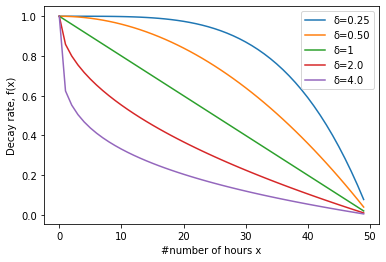

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# compute decay function
t = 50
x_elem=[]
y1_elem=[]
y2_elem=[]
y3_elem=[]
y4_elem=[]
y5_elem=[]
for x in range(t):
  y1 = max(0,1-float(pow(x/t,1/0.25)))
  #print(y)
  x_elem.append(x)
  y1_elem.append(y1)
#print(y1_elem)

for x in range(t):
  y2 = max(0,1-float(pow(x/t,1/0.5)))
  #print(y)
  #x_elem.append(x)
  y2_elem.append(y2)
#print(y2_elem)

for x in range(t):
  y3 = max(0,1-float(pow(x/t,1/1)))
  #print(y)
  #x_elem.append(x)
  y3_elem.append(y3)
#print(y3_elem)

for x in range(t):
  y4 = max(0,1-float(pow(x/t,1/2)))
  #print(y)
  #x_elem.append(x)
  y4_elem.append(y4)
#print(y4_elem)

for x in range(t):
  y5 = max(0,1-float(pow(x/t,1/4)))
  #print(y)
  #x_elem.append(x)
  y5_elem.append(y5)
#print(y5_elem)

#print(x_elem)

plt.xlabel('#number of hours x')

plt.ylabel('Decay rate, f(x)')

plt.plot(x_elem, y1_elem)
plt.plot(x_elem, y2_elem)
plt.plot(x_elem, y3_elem)
plt.plot(x_elem, y4_elem)
plt.plot(x_elem, y5_elem)

plt.legend(["δ=0.25", "δ=0.50","δ=1","δ=2.0","δ=4.0"])
plt.show()

In [2]:
import dateutil.parser as dp
from datetime import datetime
file_name = "nvdcve-1.1-2020.json"
data=json.loads(uploaded[file_name].decode("utf-8"))
t=100
len1=[]


#calculate extensiveness
for i in data['CVE_Items']:
    #print(i['cve']['CVE_data_meta']['ID'])
    lmod_time = dp.parse(i['lastModifiedDate'])
    lmod_time_in_seconds = lmod_time.timestamp()
    #print(pub_time_in_seconds, "\n")
    ext=i['cve']['references']['reference_data']
    print(ext)
    len1.append(len(ext[0]))
    p_ext=len(ext[0])/max(len1)
    print("p_ext:", p_ext)

#compute timeliness
    min_lmod=divmod(min(list_lmod), 86400)
    lmod1=divmod(lmod_time_in_seconds, 86400)
    #print(min_lmod[0])
    #print(lmod1[0])
    p_tim= min_lmod[0]/lmod1[0]
    print("p_tim:", p_tim)

    p_com=0.85
    W_ext=0.8
    W_tim=0.7
    W_com=0.65

    conf_score = (W_ext*p_ext+W_tim*p_tim+W_com*p_com)/(W_ext+W_tim+W_com)
    print("confidence score:", conf_score)
    print("ind score:",ind_score)
    Final_score = (conf_score)*(ind_score)
    print("final score:", Final_score, "\n")



NameError: ignored

In [ ]:
import dateutil.parser as dp
file_name = "Ranking2003.json"
data=json.loads(uploaded[file_name].decode("utf-8"))
print(data['CVE-2003-1460'])

KeyError: ignored

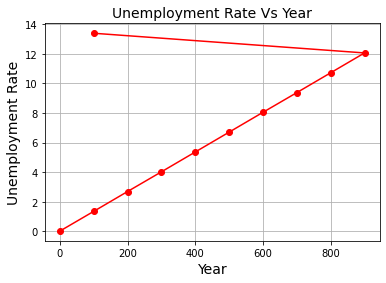

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
   
Data = {'#data blocks': [1,100,200,300,400,500,600,700,800,900,100],
        'Data signature delegation': [0.03,1.35,2.69,4.02,5.36,6.70,8.04,9.37,10.71,12.05,13.38]
        #'Verification and data store': [0.04,0.75,1.47,2.18,2.90,3.61,4.33,5.05,5.76,6.48,7.19]      
       }
  
df = pd.DataFrame(Data,columns=['#data blocks','Data signature delegation'])
  
plt.plot(df['#data blocks'], df['Data signature delegation'], color='red', marker='o')
#plt.plot(df['#data blocks'], df['Verification and data store'], color='blue', marker='o')
plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True)
plt.show()

delay_value_: 1.0
CUm_delay_value: 1.0
delay_value_: 0.9977324263038548
CUm_delay_value: 1.997732426303855
delay_value_: 0.9886621315192744
CUm_delay_value: 2.9863945578231292
delay_value_: 0.9682539682539683
CUm_delay_value: 3.9546485260770976
delay_value_: 0.9319727891156463
CUm_delay_value: 4.886621315192744
delay_value_: 0.8752834467120182
CUm_delay_value: 5.761904761904762
delay_value_: 0.7936507936507937
CUm_delay_value: 6.555555555555555
delay_value_: 0.6825396825396826
CUm_delay_value: 7.238095238095238
delay_value_: 0.5374149659863946
CUm_delay_value: 7.775510204081633
delay_value_: 0.3537414965986395
CUm_delay_value: 8.129251700680273
delay_value_: 0.1269841269841271
CUm_delay_value: 8.2562358276644
delay_value_: 0
CUm_delay_value: 8.2562358276644
delay_value_: 0
CUm_delay_value: 8.2562358276644
delay_value_: 0
CUm_delay_value: 8.2562358276644
delay_value_: 0
CUm_delay_value: 8.2562358276644
delay_value_: 0
CUm_delay_value: 8.2562358276644
delay_value_: 0
CUm_delay_value: 8.2

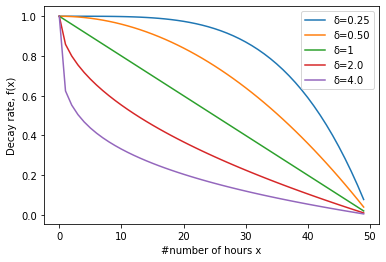

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# compute decay function
t = 50
x_elem=[]
y1_elem=[]
y2_elem=[]
y3_elem=[]
y4_elem=[]
y5_elem=[]
for x in range(t):
  y1 = max(0,1-float(pow(x/t,1/0.25)))
  #print(y)
  x_elem.append(x)
  y1_elem.append(y1)
#print(y1_elem)

for x in range(t):
  y2 = max(0,1-float(pow(x/t,1/0.5)))
  #print(y)
  #x_elem.append(x)
  y2_elem.append(y2)
#print(y2_elem)

for x in range(t):
  y3 = max(0,1-float(pow(x/t,1/1)))
  #print(y)
  #x_elem.append(x)
  y3_elem.append(y3)
#print(y3_elem)

for x in range(t):
  y4 = max(0,1-float(pow(x/t,1/2)))
  #print(y)
  #x_elem.append(x)
  y4_elem.append(y4)
#print(y4_elem)

for x in range(t):
  y5 = max(0,1-float(pow(x/t,1/4)))
  #print(y)
  #x_elem.append(x)
  y5_elem.append(y5)
#print(y5_elem)

#print(x_elem)
f_x=0.0
val=0.0
for i in range(100):
  #print(i)
  f_x = float(pow(i/21,2))+f_x
  print("delay_value_:", max(0,(1-f_x)))

  val=max(0,(1-f_x))+val
  print("CUm_delay_value:", val)

plt.xlabel('#number of hours x')

plt.ylabel('Decay rate, f(x)')

plt.plot(x_elem, y1_elem)
plt.plot(x_elem, y2_elem)
plt.plot(x_elem, y3_elem)
plt.plot(x_elem, y4_elem)
plt.plot(x_elem, y5_elem)

plt.legend(["δ=0.25", "δ=0.50","δ=1","δ=2.0","δ=4.0"])
plt.show()